<a href="https://colab.research.google.com/github/grbarbosa3/NLP/blob/main/%5BNLP%5DAnaliseSentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/stacktecnologias/stack-repo/master/Tweets_Mg.csv')
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [8]:
df['Classificacao'][20]

'Neutro'

In [9]:
def hashtag(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

In [10]:
hashtag(" #BLABLABLA ")

['BLABLABLA']

In [12]:
def remove_username(text):
  clean_text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text,)
  return clean_text

In [15]:
remove_username("@guideschain32aef teste de tweet")

' teste de tweet'

In [16]:
def remove_links_http(text):
  text = re.sub(r'http\S+','', text)
  # text = re.sub(r'https','', text)
  text = re.sub(r'bit.ly/\S+','', text)
  text = text.strip('[link]')

  return text

In [17]:
remove_links_http(df['Text'][0])

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG '

In [18]:
def remove_html_tag(text):
  clean_text = re.compile('<.*?>')
  return clean_text.sub(r'', text)

In [19]:
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

In [20]:
# remover stopwords
stopptbr = stopwords.words("portuguese")

In [21]:
len(set(stopptbr))

204

In [22]:
def remove_stopwords(text):
  stopptbr = set(stopwords.words("portuguese"))
  clean_text = ' '.join([word for word in text.split() if word not in stopptbr])

  return clean_text

In [23]:
def remove_email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

In [24]:
def remove_punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text

In [25]:
df['hashtag'] = df.Text.apply(func=hashtag)
df['CleanText'] = df.Text.apply(func=remove_links_http)
df['CleanText'] = df.CleanText.apply(func=remove_username)

df['CleanText'] = df.CleanText.apply(func=remove_html_tag)
df['CleanText'] = df.CleanText.apply(func=non_ascii)
df['CleanText'] = df.CleanText.apply(func=lower)
df['CleanText'] = df.CleanText.apply(func=remove_stopwords)
df['CleanText'] = df.CleanText.apply(func=remove_email_address)
df['CleanText'] = df.CleanText.apply(func=remove_punct)

In [27]:
df['CleanText'][0]


' @ catedral de santo antnio - governador valadares/mg '

In [28]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'hashtag', 'CleanText'],
      dtype='object')


,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,hashtag,CleanText
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],@ catedral de santo antnio - governador valad...
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"@ governador valadares, minas gerais"
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"@ governador valadares, minas gerais"
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],psol vai questionar aumento de vereadores e p...


In [31]:
df.Text[4]

'��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5'

In [32]:
df.CleanText[4]

' psol vai questionar aumento de vereadores e prefeito de bh na justia - politica - estado de minas '

In [33]:
df_new = df[['Text', 'Classificacao', 'hashtag', 'CleanText']]

In [35]:
df_new.head()

,Text,Classificacao,hashtag,CleanText
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro,[],@ catedral de santo antnio - governador valad...
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro,[],"@ governador valadares, minas gerais"
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro,[],"@ governador valadares, minas gerais"
3,��� https://t.co/BnDsO34qK0,Neutro,[],
4,��� PSOL vai questionar aumento de vereadores ...,Negativo,[],psol vai questionar aumento de vereadores e p...


In [36]:
df_new.Classificacao.unique()


array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [38]:
#Transformar classificação em numérico

dicio = {'Neutro': 0, 'Negativo': 1, 'Positivo': 2}
df_new = df_new.replace({"Classificacao": dicio})

In [39]:
df_new["Classificacao"].value_counts()

2    3300
0    2453
1    2446
Name: Classificacao, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
train, test = train_test_split(df_new, test_size=0.3, stratify = df_new["Classificacao"], random_state = 2022 )


In [42]:
y_train = train['Classificacao'].values
y_test = test['Classificacao'].values

In [43]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=1)
tfidf.fit_transform(train['CleanText'].values)
train_feature_set=tfidf.transform(train['CleanText'].values)
test_feature_set=tfidf.transform(test['CleanText'].values)

In [44]:
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


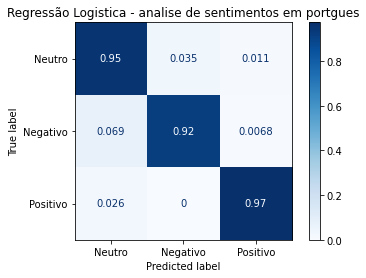

In [45]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Neutro', 'Negativo', 'Positivo'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Regressão Logistica - analise de sentimentos em portgues');

In [46]:
lr.predict(tfidf.transform(["brasil vai questionar aumento"]))

array([0])